###Import necessery Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use("default")
sns.set(font_scale=1.1)

from google.colab import files

###Upload dataset

In [ ]:
uploaded = files.upload()


df = pd.read_csv("heart.csv")

df.head()

Saving heart.csv to heart.csv


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


###basic information about row, coloum, datatype

In [ ]:
print("Shape : ", df.shape)


print("Information : ----------------")

df.info()

print("Describtion : -------------------")

df.describe().T


# df.head(20)

Shape :  (918, 12)
Information : ----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
Describtion : -------------------


,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


###define target and feature coloumn


In [ ]:
target_col = "HeartDisease"

numeric_col = ["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]
catagorical_col = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]

print(target_col, numeric_col, catagorical_col)

HeartDisease ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'] ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


###Missing values and basic quality checks

In [ ]:
df.isna().sum()  #Check missing values count per coloumn

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
#Look at some basic value range

df[numeric_col].agg(['min', 'max', 'mean', 'median', 'std'])

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364
median,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570


In [ ]:
for c in catagorical_col :
  print(c, df[c].unique())

Sex ['M' 'F']
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
RestingECG ['Normal' 'ST' 'LVH']
ExerciseAngina ['N' 'Y']
ST_Slope ['Up' 'Flat' 'Down']


###Histogram for numerical values

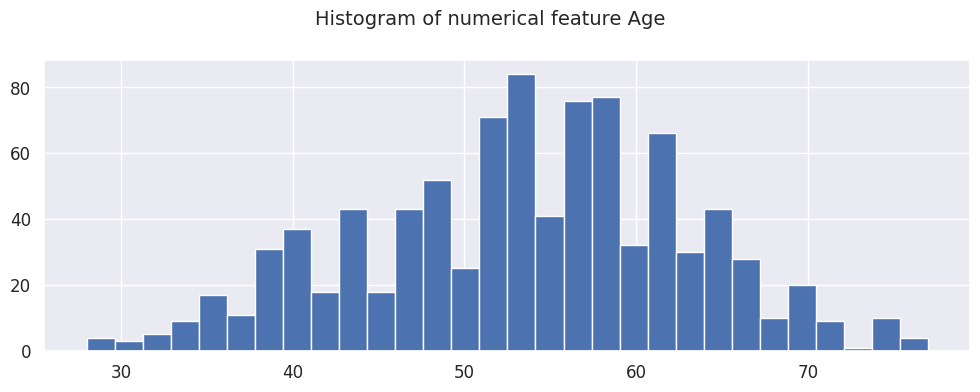

In [ ]:
df['Age'].hist(bins=30, figsize=(10, 4))
plt.suptitle('Histogram of numerical feature Age', fontsize=14)
plt.tight_layout()
plt.show()

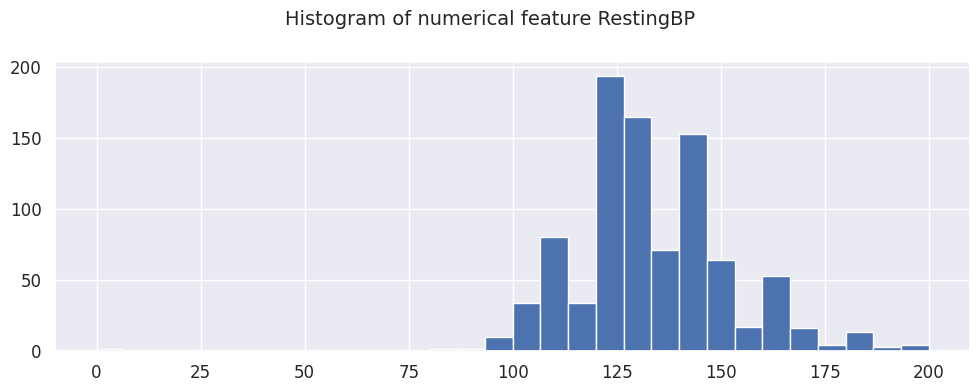

In [ ]:
df['RestingBP'].hist(bins=30, figsize=(10, 4))
plt.suptitle('Histogram of numerical feature RestingBP', fontsize=14)
plt.tight_layout()
plt.show()

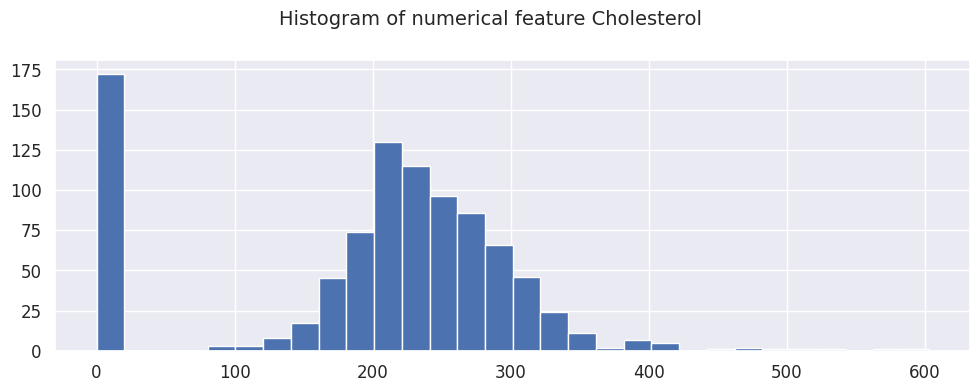

In [ ]:
df['Cholesterol'].hist(bins=30, figsize=(10, 4))
plt.suptitle('Histogram of numerical feature Cholesterol', fontsize=14)
plt.tight_layout()
plt.show()

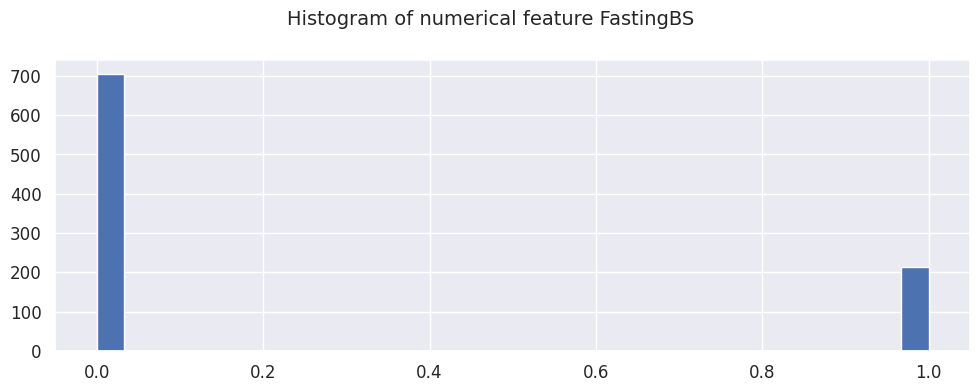

In [ ]:
df['FastingBS'].hist(bins=30, figsize=(10, 4))
plt.suptitle('Histogram of numerical feature FastingBS', fontsize=14)
plt.tight_layout()
plt.show()

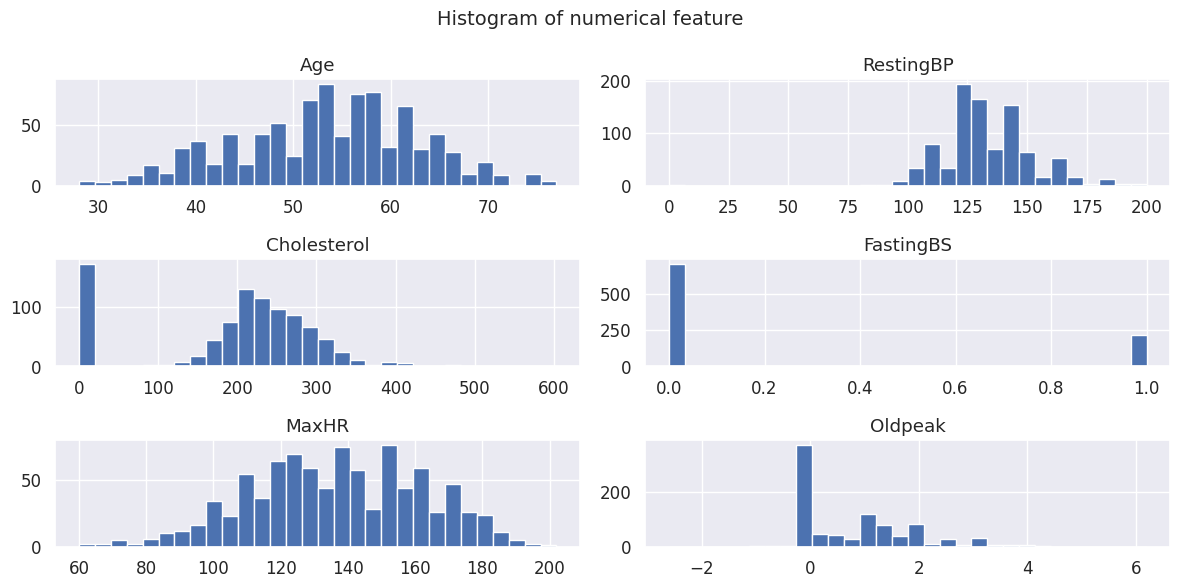

In [ ]:
df[numeric_col].hist(bins=30, figsize=(12, 6))
plt.suptitle('Histogram of numerical feature', fontsize=14)
plt.tight_layout()
plt.show()

###Box plot for all numerical column

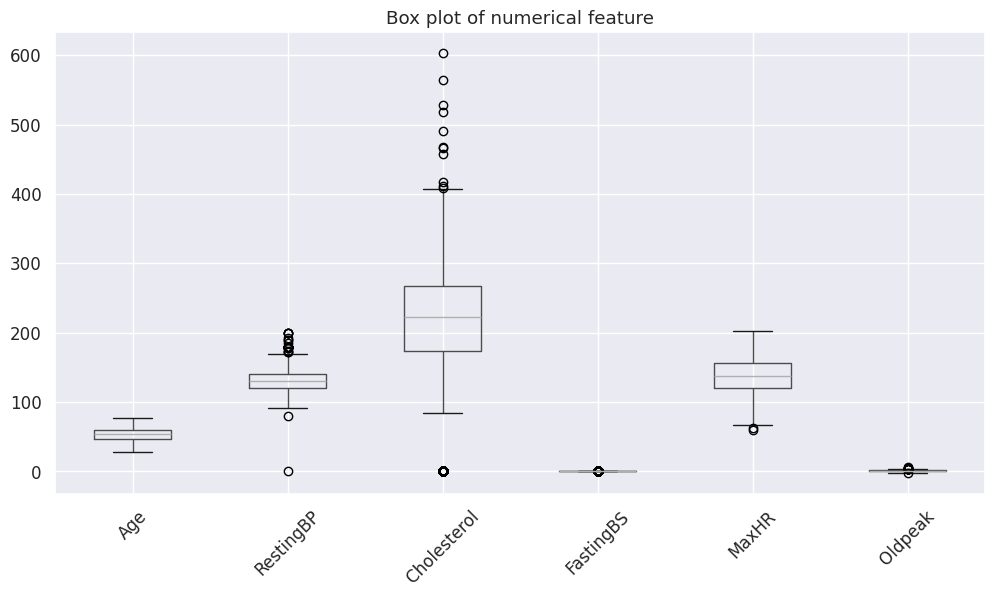

In [ ]:
plt.figure(figsize=(12, 6))
df[numeric_col].boxplot()
# df.boxplot(column=numeric_col[0]) #for single value
plt.title('Box plot of numerical feature')
plt.xticks(rotation=45)
plt.show()

###Target Distru=ibution and class Imbalance

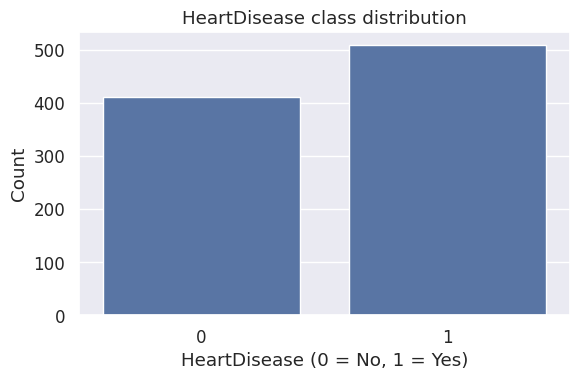

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df[target_col])
plt.title("HeartDisease class distribution")
plt.xlabel("HeartDisease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [ ]:
df[target_col].value_counts(normalize=True)

,proportion
HeartDisease,
1,0.553377
0,0.446623


###Catagorical label exploration

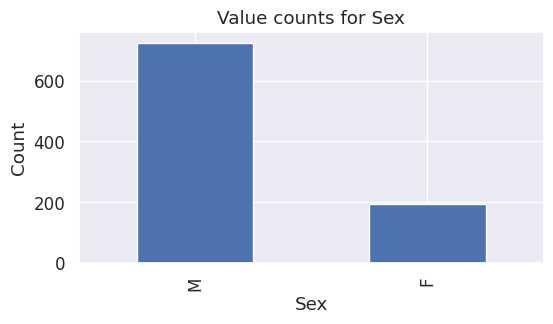

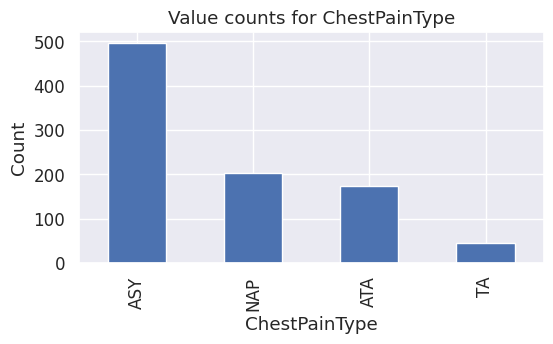

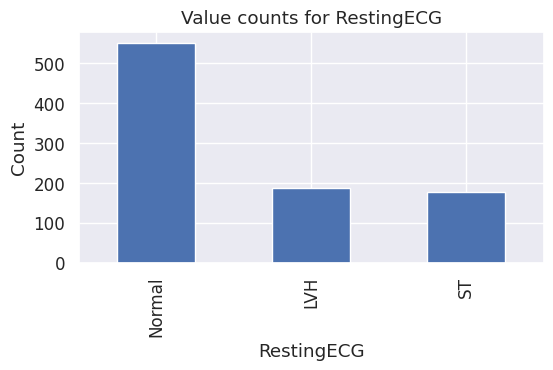

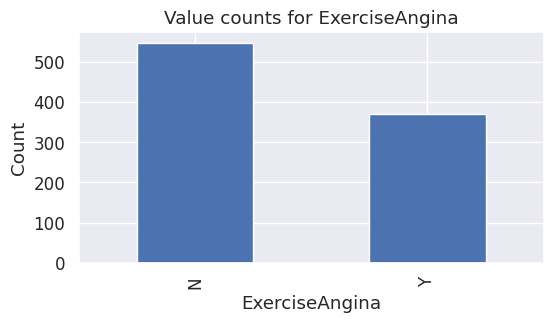

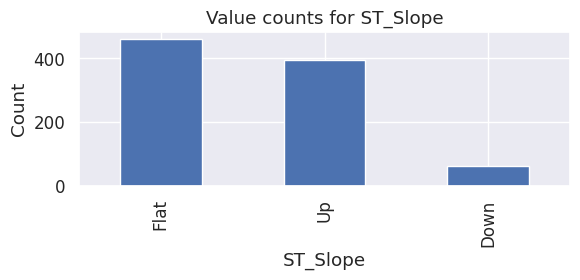

In [ ]:
for c in catagorical_col:
  plt.figure(figsize=(6, 3))
  df[c].value_counts().plot(kind="bar")
  plt.title(f"Value counts for {c}")
  plt.ylabel("Count")
plt.tight_layout()
plt.show()


###Boxplot of numeric feature split by heartDisease

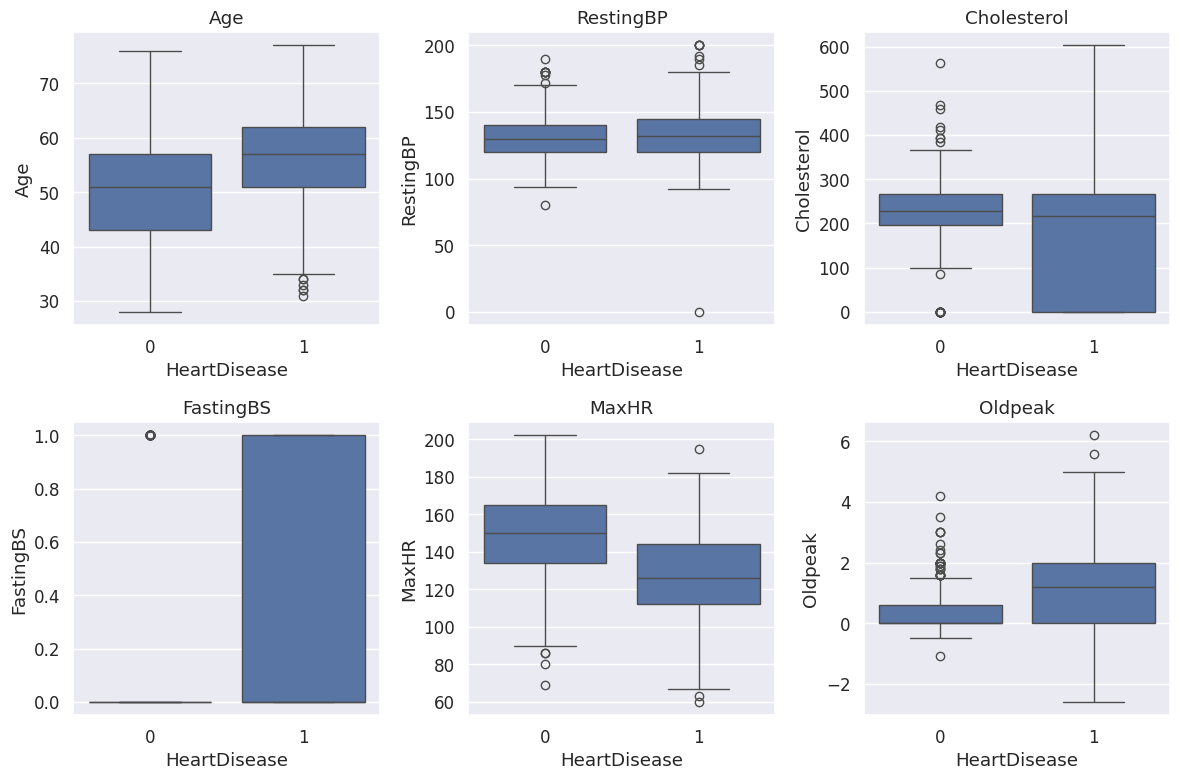

In [ ]:
plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_col,1):
  plt.subplot(2,3,i)
  sns.boxplot(x=df[target_col], y=df[col])
  plt.title(col)
plt.tight_layout()
plt.show()

###Pair plot for a subset of feature

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'] ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'] HeartDisease


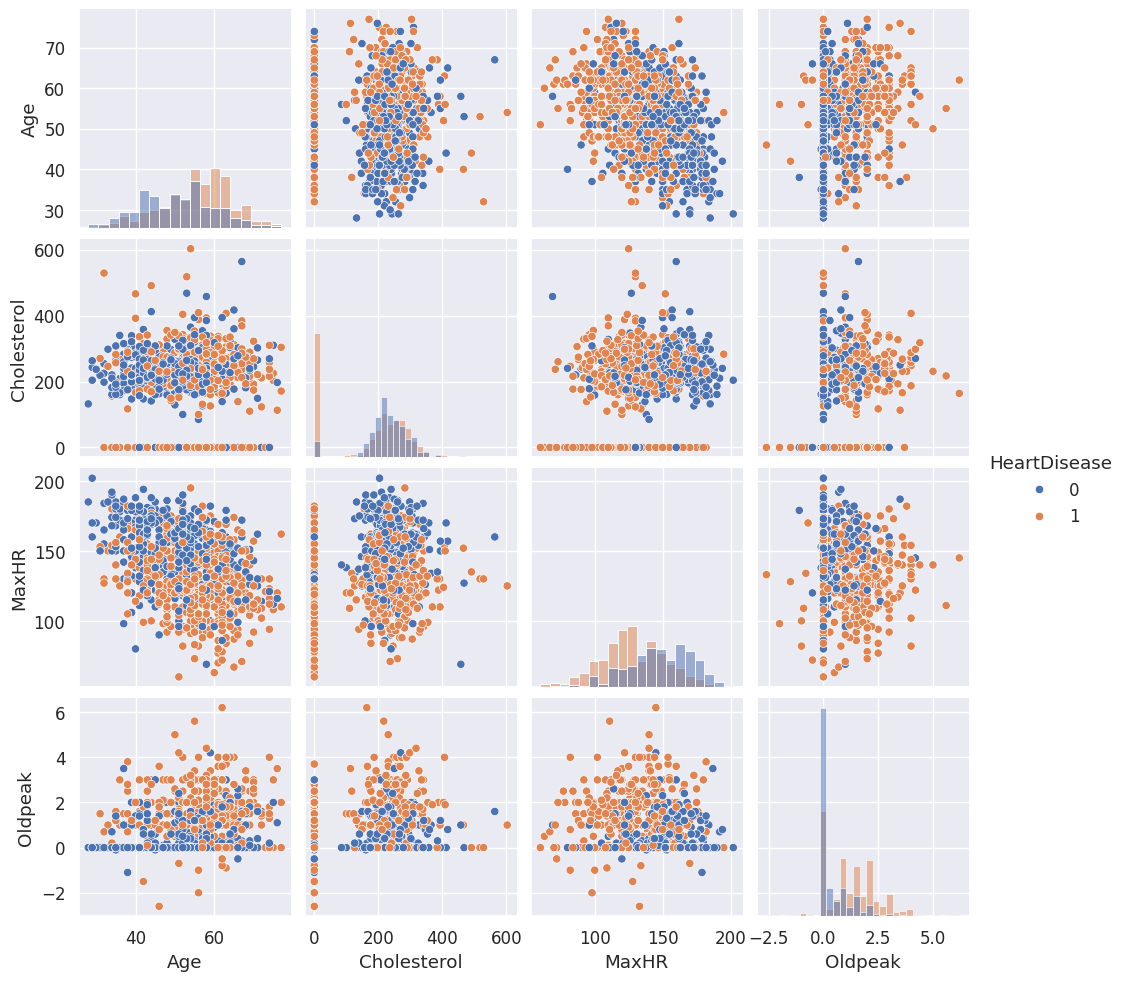

In [ ]:
print(numeric_col, catagorical_col, target_col)

sns.pairplot(df[['Age', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']], hue='HeartDisease', diag_kind='hist') #Scaterplot

###Correlation matrix and Heatmap

In [ ]:
corr_matrix = df[numeric_col + [target_col]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='0.2', linewidths='0.5')
plt.title("Correlation heatmap for numerical feature")
plt.tight_layout()
plt.show()

In [ ]:
corr_matrix[target_col].sort_values(ascending=False)

###Catagorical Feature Vs Target Feature

In [ ]:
for c in catagorical_col:
  ct = pd.crosstab(df[c], df[target_col], normalize='index')
  print(f"Proportion of heart Disease {c}")
  display(ct)

  ct.plot(kind='bar', stacked=True, figsize=(6, 4))
  plt.title(f"HeartDisease proportion by {c}")
  plt.ylabel("Proportion")
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()